In [1]:
# https://www.youtube.com/watch?v=uqomO_BZ44g&list=PLDl34vvdJq9v2E5xJSI-wWzJJST8_jLxd&index=20
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2, os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
working_dir = r'to_predict/tc/'
working_dir = r'to_predict/tm/'
MODEL = 1   # 0 for Camrys, 1 for Teslas

In [3]:
MODEL_f_L = [
    'model_3classesCamry_DL_RenNetTraining.h5',
    'model_3classesCamry_Man_RenNetTraining.h5',
    'model_4classesTesla_DL_RenNetTraining.h5',
    'model_4classesTesla_Man_RenNetTraining.h5'
]
if MODEL==0:
    cls = ['camry_12_camry_13_camry_14',
           'camry_15_camry_16_camry_17',
           'camry_18_camry_19_camry_20_camry_21']
    stoper = 8
else:
    cls = ['model_3' ,'model_s' ,'model_x' ,'model_y']
    stoper = 7

In [4]:
model_DL = tf.keras.models.load_model(MODEL_f_L[MODEL*2])
model_Man = tf.keras.models.load_model(MODEL_f_L[MODEL*2+1])
#model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



	actual: 	model_3
	 DLpredicted: 	model_3
	 Manpredicted: 	model_y
	 DL_only 1 Man_only 0 both_right0 both_wrong_same 0 both_wrong_diff 0 

	actual: 	model_3
	 DLpredicted: 	model_y
	 Manpredicted: 	model_y
	 DL_only 1 Man_only 0 both_right0 both_wrong_same 1 both_wrong_diff 0 

	actual: 	model_3
	 DLpredicted: 	model_3
	 Manpredicted: 	model_y
	 DL_only 2 Man_only 0 both_right0 both_wrong_same 1 both_wrong_diff 0 

	actual: 	model_3
	 DLpredicted: 	model_y
	 Manpredicted: 	model_y
	 DL_only 2 Man_only 0 both_right0 both_wrong_same 2 both_wrong_diff 0 

	actual: 	model_3
	 DLpredicted: 	model_y
	 Manpredicted: 	model_y
	 DL_only 2 Man_only 0 both_right0 both_wrong_same 3 both_wrong_diff 0 

	actual: 	model_3
	 DLpredicted: 	model_3
	 Manpredicted: 	model_y
	 DL_only 3 Man_only 0 both_right0 both_wrong_same 3 both_wrong_diff 0 

	actual: 	model_3
	 DLpredicted: 	model_3
	 Manpredicted: 	model_y
	 DL_only 4 Man_only 0 both_right0 both_wrong_same 3 both_wrong_diff 0 

	actual: 	model_3
	


	actual: 	model_x
	 DLpredicted: 	model_y
	 Manpredicted: 	model_y
	 DL_only 15 Man_only 0 both_right0 both_wrong_same 30 both_wrong_diff 14 

	actual: 	model_x
	 DLpredicted: 	model_3
	 Manpredicted: 	model_y
	 DL_only 15 Man_only 0 both_right0 both_wrong_same 30 both_wrong_diff 15 

	actual: 	model_x
	 DLpredicted: 	model_y
	 Manpredicted: 	model_y
	 DL_only 15 Man_only 0 both_right0 both_wrong_same 31 both_wrong_diff 15 

	actual: 	model_x
	 DLpredicted: 	model_y
	 Manpredicted: 	model_y
	 DL_only 15 Man_only 0 both_right0 both_wrong_same 32 both_wrong_diff 15 

	actual: 	model_x
	 DLpredicted: 	model_3
	 Manpredicted: 	model_y
	 DL_only 15 Man_only 0 both_right0 both_wrong_same 32 both_wrong_diff 16 

	actual: 	model_x
	 DLpredicted: 	model_y
	 Manpredicted: 	model_y
	 DL_only 15 Man_only 0 both_right0 both_wrong_same 33 both_wrong_diff 16 

	actual: 	model_x
	 DLpredicted: 	model_y
	 Manpredicted: 	model_y
	 DL_only 15 Man_only 0 both_right0 both_wrong_same 34 both_wrong_diff 16 

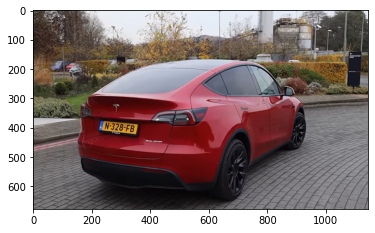

In [5]:
DL_only, Man_only, both_right, both_wrong_same , both_wrong_diff = 0,0,0,0,0
for f in os.listdir(working_dir):
    img = image.load_img(working_dir+f)
    plt.imshow(img)
    #plt.show()
    
    img = image.load_img(working_dir+f, target_size = (150,150,3))
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])

    val_DL = model_DL.predict(images)
    val_Man = model_Man.predict(images)

    def vai(va):
        for i in list(range(0,len(va[0]))):
            if va[0][i] != 0:
                return i
        return -1
    pd_DL =  cls[vai(val_DL)]
    pd_Man =  cls[vai(val_Man)]

    print('\n\tactual: \t'+ f[:stoper] +'\n\t DLpredicted: \t'+ cls[vai(val_DL)]+'\n\t Manpredicted: \t'+ cls[vai(val_Man)])
   
    if f[:stoper] in pd_DL and f[:stoper] not in pd_Man:
        DL_only += 1
        #print('\n\tactual: \t'+ f[:stoper] +'\n\t DLpredicted: \t'+ cls[vai(val_DL)]+'\n\t Manpredicted: \t'+ cls[vai(val_Man)])
    elif f[:stoper] not in pd_DL and f[:stoper] in pd_Man:
        Man_only += 1
        #print('\n\tactual: \t'+ f[:stoper] +'\n\t DLpredicted: \t'+ cls[vai(val_DL)]+'\n\t Manpredicted: \t'+ cls[vai(val_Man)])
    elif f[:stoper] not in pd_DL and f[:stoper] not in pd_Man and pd_DL != pd_Man :
        both_wrong_diff += 1
    elif f[:stoper] not in pd_DL and f[:stoper] not in pd_Man and pd_DL == pd_Man :
        both_wrong_same += 1
    elif f[:stoper] in pd_DL and f[:stoper] in pd_Man:
        both_right += 1
    print('\t DL_only {0} Man_only {1} both_right{2} both_wrong_same {3} both_wrong_diff {4} '.format(DL_only, Man_only, both_right, both_wrong_same , both_wrong_diff))